# Part I - (FordGoBike Dataset Exploration)
## by (OLUWATOSIN IFEOLUWAPO OLALERE)

## Introduction
> This document explores a dataset containing trip details of approximately 185,000 bike trips. It includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [3]:
# load in the dataset into a pandas dataframe, print statistics

bike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)
bike.head(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
# descriptive statistics for numeric variables

bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
bike.nunique() 

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [7]:
#Checking for nulls

bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [9]:
bike['member_birth_year'].unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

In [10]:
bike.member_birth_year.sort_values(ascending=True)

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
108314    1900.0
41194     1900.0
110468    1900.0
115637    1900.0
26133     1900.0
107359    1900.0
58222     1900.0
72819     1900.0
102148    1900.0
24042     1900.0
16087     1900.0
60960     1900.0
109010    1900.0
177708    1900.0
162051    1900.0
97721     1900.0
75686     1900.0
62598     1900.0
27675     1900.0
171086    1900.0
21424     1900.0
61611     1900.0
171996    1900.0
78897     1900.0
94326     1900.0
           ...  
182896       NaN
182904       NaN
182919       NaN
182951       NaN
182991       NaN
183019       NaN
183077       NaN
183104       NaN
183112       NaN
183126       NaN
183131       NaN
183135       NaN
183164       NaN
183180       NaN
183194       NaN
183198       NaN
183209       NaN
183212       NaN
183215       NaN
183226       NaN
183281       NaN
183286       NaN
183306       NaN
183310       NaN
183332       NaN
183354       NaN
183356       NaN
183363       N

### What is the structure of your dataset?

There are 183,412 rides information in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year,
member_gender, bike_share_for_all_trip). 9 variables are numeric in nature, while 7 are not.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features distinguish bikers and the stations in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe that user type, member gender and member year will give specific insights into what types of individuals ride, and then the coordinates of the start and end stations will also give insights into what distinguishes the bikers.

### Data Wrangling

##### For effective visualization to take place, a number of data wranging techniques need to be adopted, both quality issues, and tidiness issues. Also, feature engineering is very important, as new data needs to be generated from existing data.

In [11]:
# Make a copy of the original dataset.

bike_copy = bike.copy()

### Quality Issues

#### 1. Change data types

1. Change the data type for 'start_time' and 'end_time' from string to datetime.
2. Change the data type for 'bike_id' from int to string.
3. Change the data type for 'start_station_id' and 'end_station_id' from float to string.

In [12]:
bike_copy['start_time'] = pd.to_datetime(bike_copy['start_time'])
bike_copy['end_time'] = pd.to_datetime(bike_copy['end_time'])
bike_copy['start_station_id'] = bike_copy['start_station_id'].astype(str)
bike_copy['end_station_id'] = bike_copy['end_station_id'].astype(str)
bike_copy['bike_id'] = bike_copy['bike_id'].astype(str)

In [13]:
#Check to confirm

bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usa

#### 2. Clean missing values by dropping all na values.

In [14]:
bike_copy.dropna(inplace = True)

In [15]:
#Check to confirm

bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usa

In [16]:
bike_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### 3. No one was born in 1878 and is still alive, must have been an error, so input 1978 instead.

In [17]:
bike_copy.member_birth_year = bike_copy.member_birth_year.replace(1878.0,1978)

In [18]:
#Check to confirm

bike_copy.query('member_birth_year == 1878.0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Tidiness Issue

The longitude and latitude coordinates for start station and end station can be combined and used to calculate a distance in kilometres, using the haversine formula after which those 4 columns can be dropped and just replaced by the distance calculated from the haversine formula.

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

In [19]:
# vectorized haversine function

# Code gotten from https://stackoverflow.com/questions/40452759/

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    
    # multiply by Earth radius to get kilometers
    return earth_radius * 2 * np.arcsin(np.sqrt(a))


# calculate the distance per trip

bike_copy['distance_km'] = haversine(bike_copy.start_station_latitude, bike_copy.start_station_longitude,
                    bike_copy.end_station_latitude, bike_copy.end_station_longitude)

In [20]:
# Check the new column

bike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.332203


#### Now let us drop the four columns 'start_station_latitude', 'start_station_longitude', 'end_station_latitude' and 'end_station_longitude'.

In [21]:
bike_copy.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

In [22]:
#Check

bike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.409301
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.332203


### Feature Engineering

1. Duration should be converted from seconds to minutes.
2. Convert start_time and end_time to week days.
3. Member birth year should be converted to Member age.

#### 1. Duration should be converted from seconds to minutes.

In [23]:
bike_copy['duration_min'] = bike_copy['duration_sec']/60

In [24]:
bike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.544709,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.704545,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260739,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.409301,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.332203,29.883333


In [25]:
#Convert to integer so it can be used for visualization

bike_copy['duration_min'] = bike_copy['duration_min'].astype(int)

#### 2. Convert start_time and end_time to week days.

In [26]:
bike_copy['start_weekday'] = bike_copy['start_time'].dt.strftime('%a')
bike_copy['end_weekday'] = bike_copy['end_time'].dt.strftime('%a')

In [27]:
#Check

bike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,duration_min,start_weekday,end_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.544709,869,Thu,Fri
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.704545,1030,Thu,Fri
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260739,608,Thu,Fri
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.409301,26,Thu,Fri
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.332203,29,Thu,Fri


#### 3. Member birth year should be converted to Member age.

In [28]:
#First, let us check the timeframe of the data captured.

print(f' start time min : {bike.start_time.min()}, max {bike.start_time.max()}' )
print(f' end time min : {bike.end_time.min()}, max {bike.end_time.max()}' )

 start time min : 2019-02-01 00:00:20.6360, max 2019-02-28 23:59:18.5480
 end time min : 2019-02-01 00:04:52.0580, max 2019-03-01 08:01:55.9750


##### We see here that it was from 1st of February 2019 to 1st of March 2019.

In [29]:
#The data is a 2019 data, so 2019 will be used as the reference point.

bike_copy['member_age'] = 2019 - bike_copy['member_birth_year']

In [30]:
#Check

bike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,duration_min,start_weekday,end_weekday,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.544709,869,Thu,Fri,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.704545,1030,Thu,Fri,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260739,608,Thu,Fri,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.409301,26,Thu,Fri,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.332203,29,Thu,Fri,60.0


In [31]:
#Convert age to integer so it can be used for visualization

bike_copy['member_age'] = bike_copy['member_age'].astype(int)

#### Drop the columns 'duration_sec', 'start_time', 'end-time' and 'member_birth_year', since new features have been generated from them already.

In [32]:
bike_copy.drop(['duration_sec', 'start_time','end_time','member_birth_year'],axis=1,inplace=True)

In [33]:
#Check for dropped columns and data types

bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
start_station_id           174952 non-null object
start_station_name         174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
distance_km                174952 non-null float64
duration_min               174952 non-null int64
start_weekday              174952 non-null object
end_weekday                174952 non-null object
member_age                 174952 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 18.7+ MB


In [34]:
bike_copy.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance_km,duration_min,start_weekday,end_weekday,member_age
0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,0.544709,869,Thu,Fri,35
2,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2.704545,1030,Thu,Fri,47
3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,0.260739,608,Thu,Fri,30
4,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2.409301,26,Thu,Fri,45
5,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,3.332203,29,Thu,Fri,60


## Univariate Exploration

### Question 1

##### Which gender embarked on bike trips the most?


### Visualization

(-1.1072120586958056,
 1.120383549049385,
 -1.1199404454079513,
 1.1076551623372393)

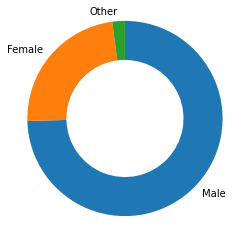

In [35]:
sorted_counts = bike['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

### Observation

##### It was observed that the males embarked on the most bike trips

### Question 2

##### What was the dominant user type?


### Visualization

(-1.1064183360400863,
 1.105935178635703,
 -1.1011591870243223,
 1.111194327651467)

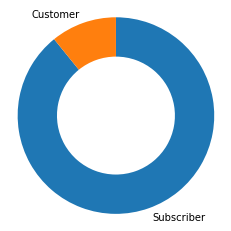

In [36]:
sorted_counts = bike['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

### Observation

##### The majority of users were subscribers

### Question 3

##### What was the percentage of those that shared their bike for all trips like?


### Visualization

(-1.107306316786771,
 1.1072300185309287,
 -1.105479093525048,
 1.1090572417926516)

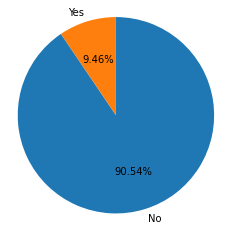

In [37]:
sorted_counts = bike['bike_share_for_all_trip'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct = '%1.2f%%');

plt.axis('square')

### Observation

##### Most trips (90.54%) didn't share bikes during theior trips.

### Question 4

##### What is the most common trip duration?


### Visualization

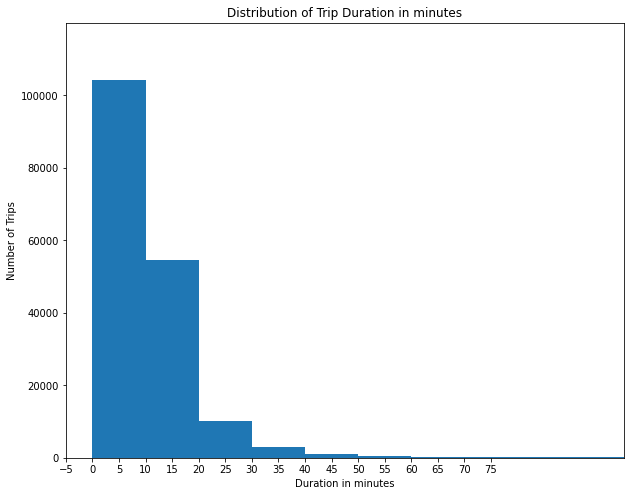

In [38]:
binsize = 10
bins = np.arange(0, bike_copy['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = bike_copy, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Duration in minutes')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Trips')
plt.axis([-5, 100, 0, 120000])
plt.xticks(range(-5,80,5))
plt.yticks(range(0,120000,20000))
plt.show()

### Observation

##### It was observed that most trips lasted between 0 and 20 minutes

### Question 5

##### What is the distribution of days people rode their bikes the most in the week?


### Visualization

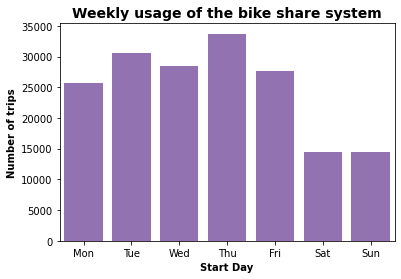

In [39]:
colorbar = sb.color_palette()[4]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = bike_copy, x='start_weekday', color = colorbar, order = weekday)
plt.title("Weekly usage of the bike share system",
               fontsize = 14, weight = "bold")
plt.xlabel('Start Day',fontsize = 10, weight = "bold")
plt.ylabel('Number of trips', fontsize = 10, weight = "bold")
plt.yticks(range(0,40000,5000));


### Observation

##### It is observed that most riders rode during the week and there were less rides at the weekend.

### Question 6

##### What is the age distribution of most bikers?


### Visualization

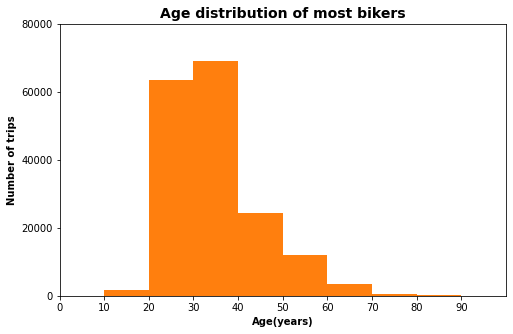

In [40]:
colorbar = sb.color_palette()[1]
binsize = 10
bins = np.arange(0, bike_copy['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_copy, x = 'member_age', bins = bins, color = colorbar)
plt.title('Age distribution of most bikers',
               fontsize = 14, weight = "bold")
plt.xlabel('Age(years)',
               fontsize = 10, weight = "bold")
plt.ylabel('Number of trips',
               fontsize = 10, weight = "bold")
plt.axis([0, 100, 0, 80000])
plt.xticks(range(0,100,10))
plt.yticks(range(0,100000,20000))
plt.show()

### Observation

##### The majority of riders were between 20 and 40 years old.

### Question 7

##### What is the distribution of distances covered in kilometres?


### Visualization

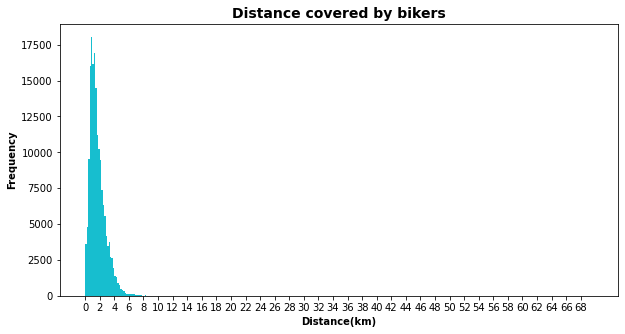

In [41]:
colorbar = sb.color_palette()[9]
bin = np.arange(bike_copy.distance_km.min(),bike_copy.distance_km.max()+0.2,0.2);
ticks = np.arange(bike_copy.distance_km.min(),bike_copy.distance_km.max()+0.5,2);

plt.figure(figsize=[10, 5])
plt.xticks(ticks)
bike_copy.distance_km.plot.hist(bins = bin, color = colorbar)
plt.title('Distance covered by bikers',
               fontsize = 14, weight = "bold")
plt.xlabel('Distance(km)',
               fontsize = 10, weight = "bold")
plt.ylabel('Frequency',
               fontsize = 10, weight = "bold")

plt.show()

### Observation

##### It is a right skewed distribution, with most distances between 2km and 4km

### Question 8

##### The distribution of the users on a bar chart.


### Visualization

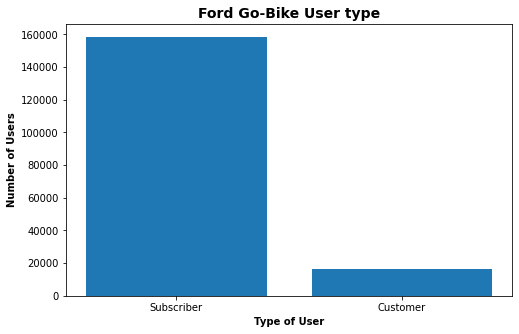

In [42]:
plt.figure(figsize=[8,5])
plt.bar(x = bike_copy.user_type.value_counts().keys(), height = bike_copy.user_type.value_counts() )
plt.title('Ford Go-Bike User type',
               fontsize = 14, weight = "bold")
plt.xlabel('Type of User',
               fontsize = 10, weight = "bold")
plt.ylabel('Number of Users',
               fontsize = 10, weight = "bold")
plt.yticks(range(0,180000,20000))
plt.show()

### Observation

##### Less than 20,000 of the users are Customers, not Subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distributions for type  users and for gender had quite some margins. Also, the age range for most bikers were in the youthful, justifying the fact that bike rides are predominantly for people with strength.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The unusual distributions were already mentioned above. Yes I cleaned and tidied the dataset. I had to get the members' age, the distances covered from the latitude and longitude values, and then the duration of trips in minutes.

## Bivariate Exploration


### Question 1

##### Which gender rode longer distances?


### Visualization

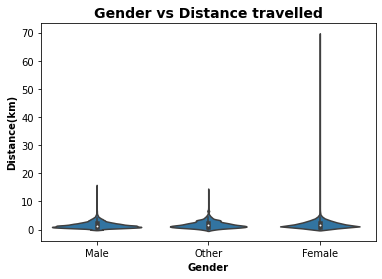

In [43]:
base_color = sb.color_palette()[0]
 
sb.violinplot(data=bike_copy, x='member_gender', y='distance_km', color=base_color)
plt.xlabel('Gender',fontsize = 10, weight = "bold")
plt.ylabel('Distance(km)',fontsize = 10, weight = "bold")
plt.title('Gender vs Distance travelled',fontsize = 14, weight = "bold");

### Observation

##### There seems to be not much difference, with females slightly edging males in the distance covered.

### Question 2

##### Is age a factor to be considered in the distances travelled by riders?


### Visualization

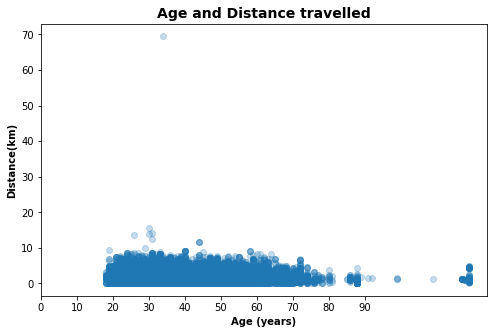

In [44]:
plt.figure(figsize=[8,5])
plt.scatter(data = bike_copy, x = 'member_age', y = 'distance_km', alpha = 0.25)
plt.xticks(range(0, 100, 10))           
plt.xlabel('Age (years)',fontsize = 10, weight = "bold")
plt.ylabel('Distance(km)',fontsize = 10, weight = "bold")
plt.title('Age and Distance travelled',fontsize = 14, weight = "bold")
plt.show()

###### There seems to an outlier of a distance around 70km, let us remove that for beteer visualization.

In [45]:
#Check

bike_copy.query('distance_km>60')

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance_km,duration_min,start_weekday,end_weekday,member_age
112038,21.0,Montgomery St BART Station (Market St at 2nd St),300.0,Palm St at Willow St,4780,Subscriber,Female,No,69.469241,115,Tue,Tue,34


In [46]:
#Drop the outlier

bike_copy.query('distance_km<60',inplace=True) 

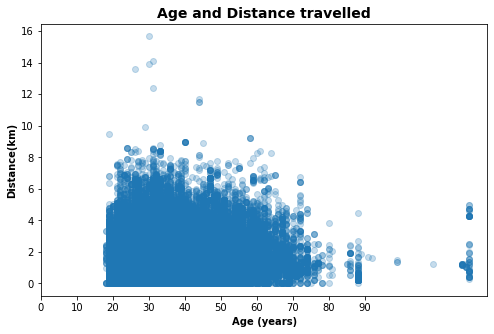

In [47]:
#Let's plot again

plt.figure(figsize=[8,5])
plt.scatter(data = bike_copy, x = 'member_age', y = 'distance_km', alpha = 0.25)
plt.xticks(range(0, 100, 10))           
plt.xlabel('Age (years)',fontsize = 10, weight = "bold")
plt.ylabel('Distance(km)',fontsize = 10, weight = "bold")
plt.title('Age and Distance travelled',fontsize = 14, weight = "bold")
plt.show()

### Observation

##### Age seems not to have so much to do with distance covered.

### Question 3

##### How do some of the features in the dataset correlate?


### Visualization

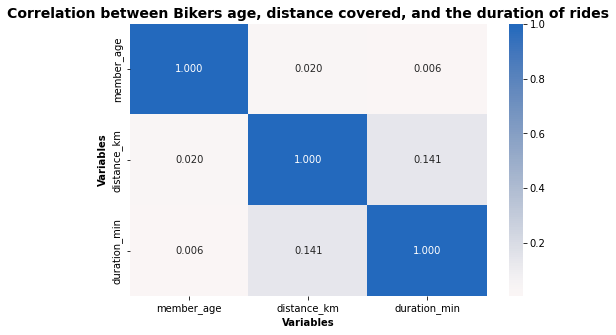

In [48]:
numeric_vars = ['member_age', 'distance_km', 'duration_min']

plt.figure(figsize = [8, 5])
sb.heatmap(bike_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.xlabel('Variables',fontsize = 10, weight = "bold")
plt.ylabel('Variables',fontsize = 10, weight = "bold")
plt.title('Correlation between Bikers age, distance covered, and the duration of rides',fontsize = 14, weight = "bold")
plt.show()


### Observation

##### There seems not to be a strong correlation between members' age, distance covered, and the time in which it is.

### Question 4

##### How does user type compare with bike sharing?


### Visualization

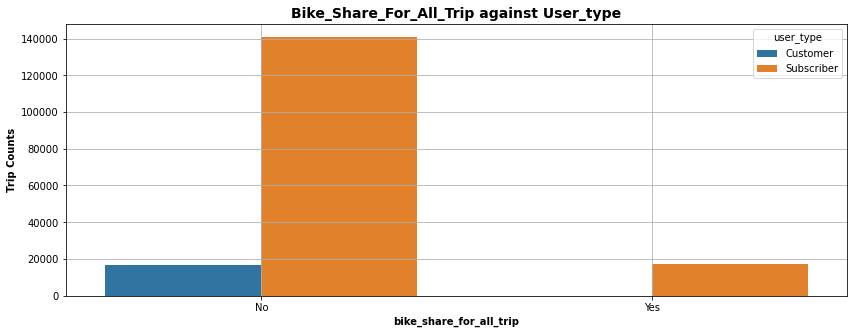

In [49]:
plt.figure(figsize = [14, 5])
sb.countplot(data = bike_copy, x="bike_share_for_all_trip", hue="user_type",);
plt.grid()
plt.title("Bike_Share_For_All_Trip against User_type",
          fontsize = 14, weight = "bold");

plt.xlabel("bike_share_for_all_trip",
           fontsize = 10, weight = "bold");

plt.ylabel("Trip Counts",
               fontsize = 10, weight = "bold");

### Observation

##### It appears all customers travel alone.

### Question 5

##### Which user type travels farther?


### Visualization

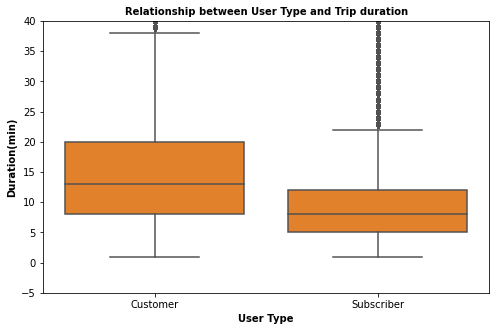

In [50]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike_copy, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim([-5, 40])
plt.xlabel('User Type', fontsize = 10, weight = "bold")
plt.ylabel('Duration(min)',
          fontsize = 10, weight = "bold")
plt.title('Relationship between User Type and Trip duration',
          fontsize = 10, weight = "bold")
plt.show()

### Observation

##### Customers generally travel farther than subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I observed that Customers generally travelled farther than subscribers, and there seemed to be no relationshop between members' ages, the distance covered, and the time it took them to cover that distance!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was interesting to see that all customers seem to travel alone.

## Multivariate Exploration

### Question 1

##### What is the relationship between the speed of each user type. (The speed of each user type can be obseved through the distance covered in km and the duration in minutes)


### Visualization

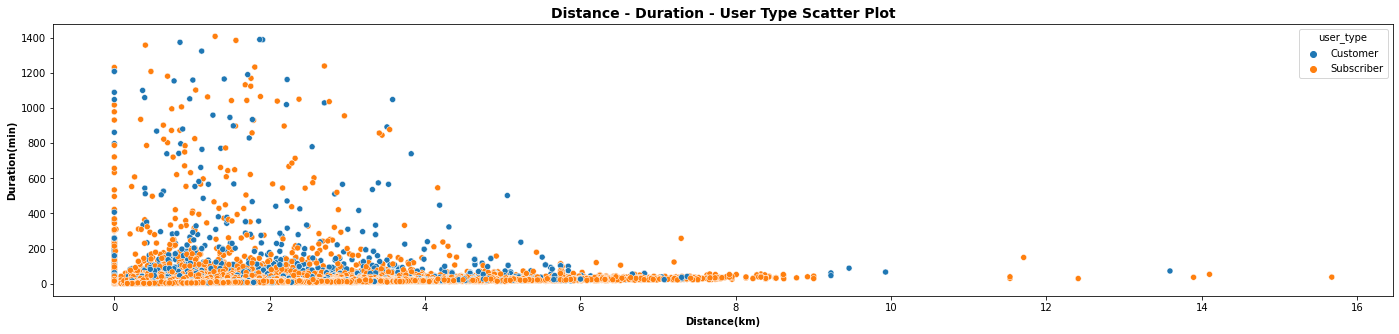

In [51]:
plt.figure(figsize = [24, 5])

sb.scatterplot(data = bike_copy, x='distance_km',y= "duration_min", hue = 'user_type');

plt.title("Distance - Duration - User Type Scatter Plot",fontsize = 14, weight = "bold");
plt.xlabel("Distance(km)",fontsize = 10, weight = "bold");
plt.ylabel("Duration(min)",
               fontsize = 10, weight = "bold");

plt.show()

### Observation

##### It seems customers are less likely to embark on long distance trips.

### Question 2

##### What is the duration of rides for each day of the week per user type?


### Visualization

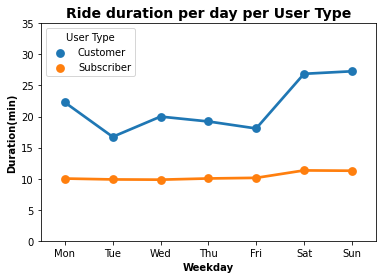

In [52]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.pointplot(data=bike_copy, x='start_weekday', y='duration_min', hue='user_type', errwidth=0, order = weekday)
plt.xlabel('Weekday',
          fontsize = 10, weight = "bold")
plt.ylabel('Duration(min)',
          fontsize = 10, weight = "bold")
plt.title('Ride duration per day per User Type',
          fontsize = 14, weight = "bold")
plt.yticks(range(0, 40, 5)) 
plt.legend(title='User Type')
plt.show()

### Observation

##### Customers spent longer riding, compared to subscribers.

### Question 3

##### How does the duration per gender per age compare?


### Visualization

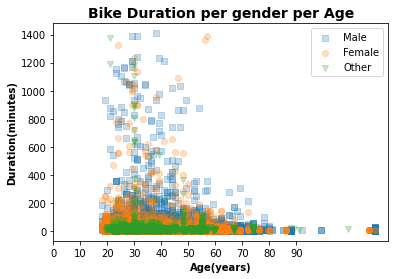

In [53]:
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    rider_gender = bike_copy[bike_copy['member_gender'] == gender]
    plt.scatter(rider_gender['member_age'], rider_gender['duration_min'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 1600, 200)) 
plt.xlabel('Age(years)',
          fontsize = 10, weight = "bold")
plt.ylabel('Duration(minutes)',
          fontsize = 10, weight = "bold")
plt.title('Bike Duration per gender per Age',
          fontsize = 14, weight = "bold")
plt.show()

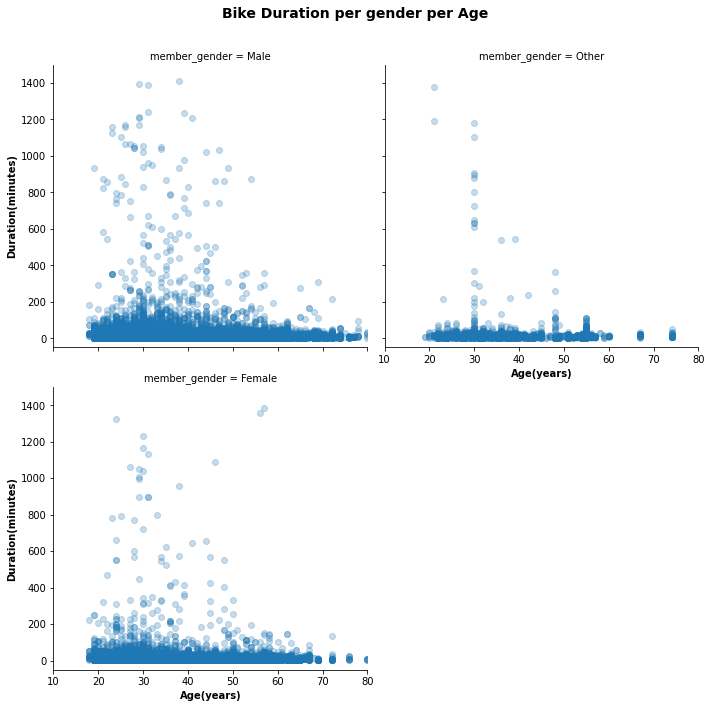

In [54]:
#Making it clearer

genders = sb.FacetGrid(data = bike_copy, col = 'member_gender', col_wrap = 2, height = 5,
                 xlim = [10, 80], ylim = [-50, 1500])
genders.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
genders.set_xlabels('Age(years)',
          fontsize = 10, weight = "bold")
genders.set_ylabels('Duration(minutes)',
          fontsize = 10, weight = "bold")

genders.fig.subplots_adjust(top=0.9)

genders.fig.suptitle('Bike Duration per gender per Age',
          fontsize = 14, weight = "bold")
plt.show()


### Observation

##### A good number of males tend to travel for longer than females.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers spent longer riding, compared to subscribers

### Were there any interesting or surprising interactions between features?

Seems the males travelled with more speeds compared to females.

## Conclusions

The Gobike data was an interesting data to work with, as much of the insights needed were not originally available on the surface. As such, much cleaning, wrangling and feature engineering were needed to get the data into the shape that will make visualizations easier.

Member ages, distances trvalled and duration of trips were calculated for effective visualization.

There was really no correlation between gender and distances covered, and the duration of the rides.

It was also interesting to observe that most rides seemed to happen during the week, as compared to weekends.

There were a lot more subscribers than customers, and customers also seemed to travel alone and not share their bikes.


In [55]:
#Saving the clean dataset

bike_copy.to_csv('gobike_clean.csv', index=False)